# 📈 Let's discover the inherent clusters Kmean

# 💾 Data

> We are going to use the `CC General` dataset.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize

In [16]:
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
data.shape

(8950, 18)

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [19]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [20]:
stats = data.describe()
stats=stats.transpose()
pd.DataFrame(stats)

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [21]:
data = data.drop("CUST_ID", axis = 1)
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna((data['CREDIT_LIMIT'].mean()))
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna((data['MINIMUM_PAYMENTS'].mean()))

<AxesSubplot:>

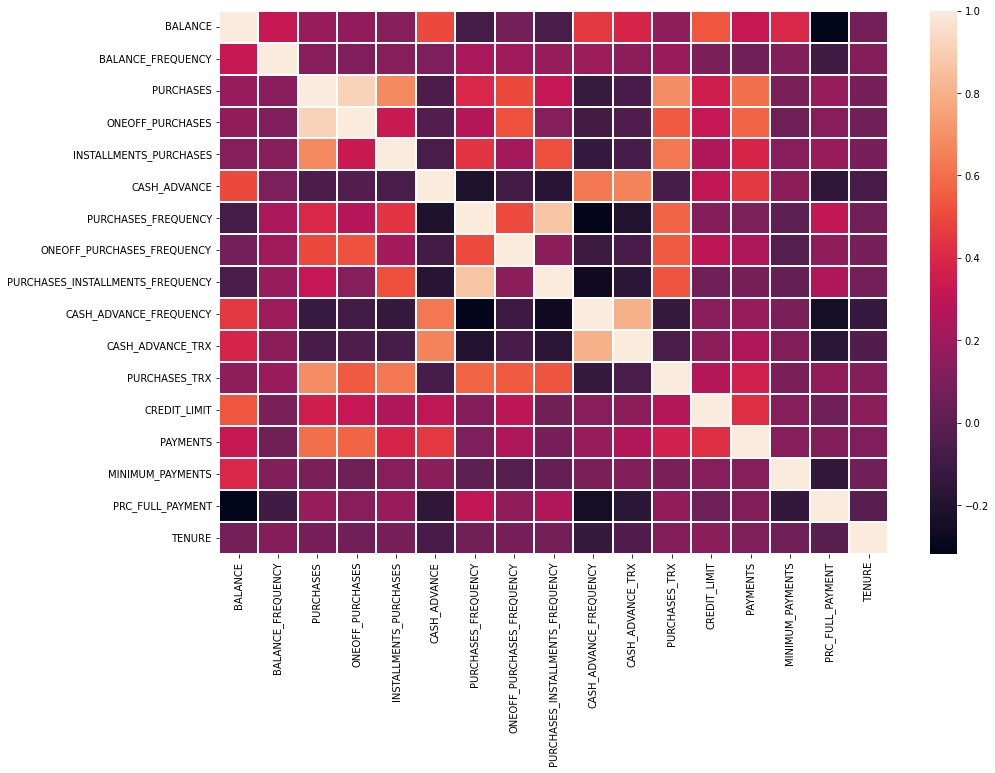

In [22]:
corrmat = data.corr()
f, ax = plt.subplots(figsize =(15, 10))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

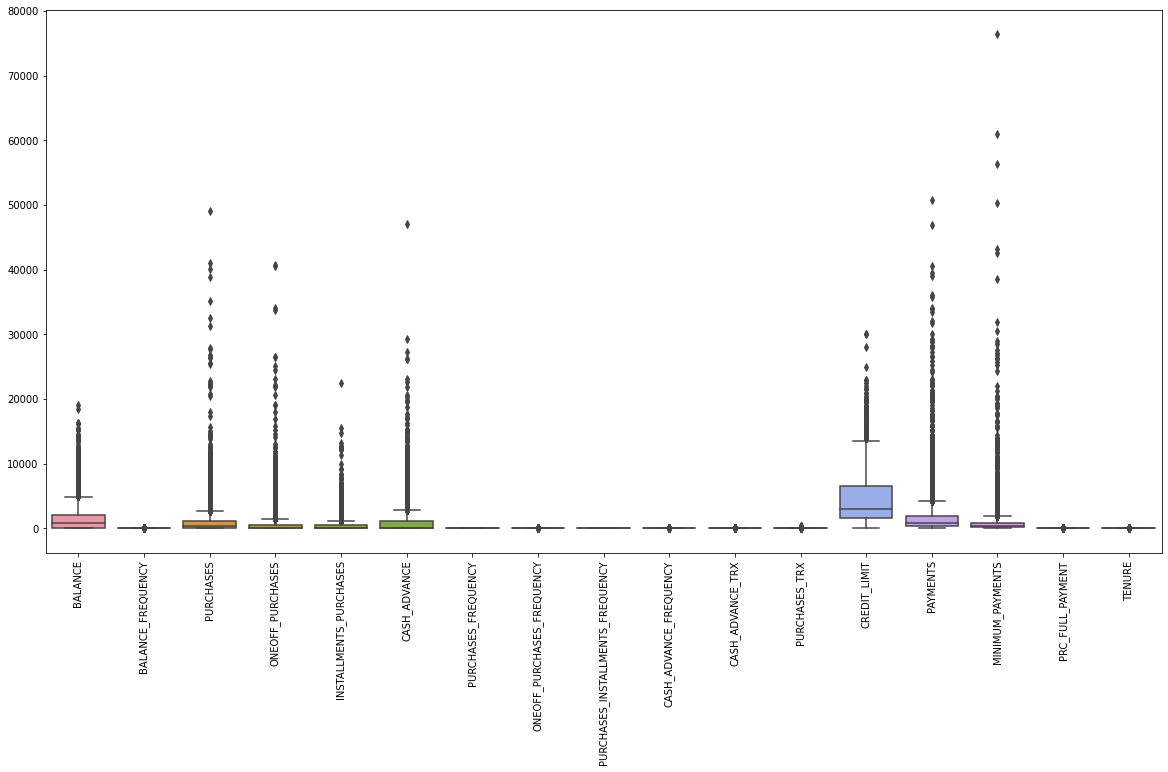

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [24]:
# Scaling the data so that all the features become comparable
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


In [25]:
#Hierarchical clustering
X = data_scaled.iloc[:, [0, 13]].values

hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_hc = hierarchical.fit_predict(X)

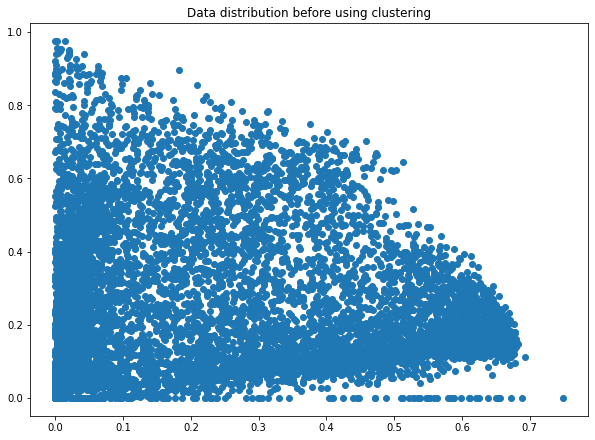

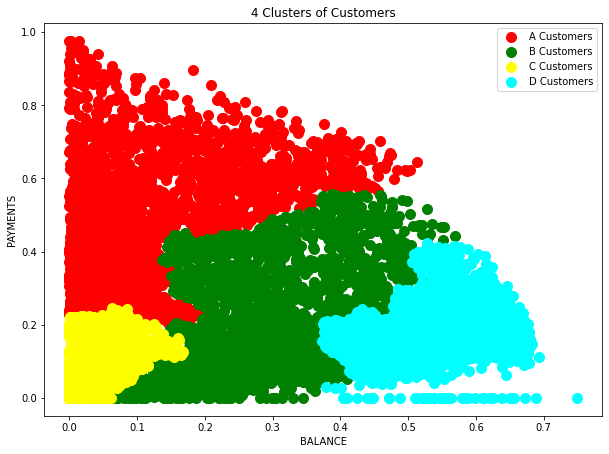

In [30]:
#Plot the clusters
#Data distribution before using clustering
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1])
plt.title('Data distribution before using clustering')
plt.show()

#Data distribution after using clustering
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'A Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'B Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'yellow', label = 'C Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'D Customers')

plt.title('4 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend()

plt.show()

In [32]:
#Dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Error in callback <function flush_figures at 0x000001B2EC9D4F70> (for post_execute):


KeyboardInterrupt: 

##Number of Clusters

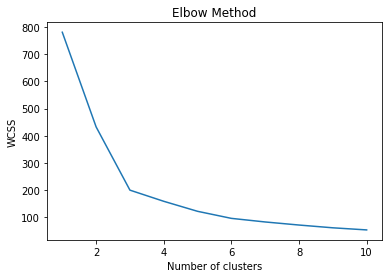

In [33]:
#1- Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

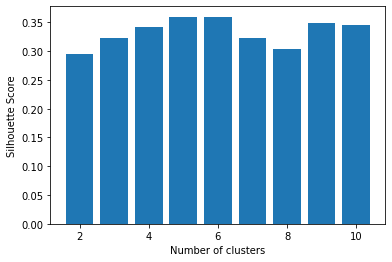

In [34]:
#Silhouette Scores Method
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(data_scaled, KMeans(n_clusters = n_cluster).fit_predict(data_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8 ,9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

##Plot the clusters

In [ ]:
#Plot the clusters

In [35]:
kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
y_kmeans = kmeans.fit_predict(X)
labels= kmeans.labels_

In [36]:
pca= PCA(n_components=2)
X_PCA= pca.fit_transform(X)

In [38]:
pca_data = pd.DataFrame(data=X_PCA, columns=['BALANCE','PAYMENTS'])
pca_data['labels']= labels
pca_data.head()

,BALANCE,PAYMENTS,labels
0,-0.172479,-0.129433,2
1,0.005613,0.128088,1
2,0.122415,-0.147708,0
3,0.051620,-0.255386,2
4,0.189585,0.238426,0


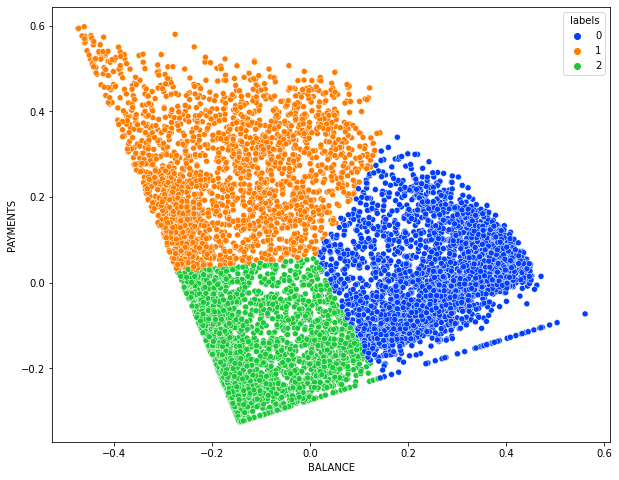

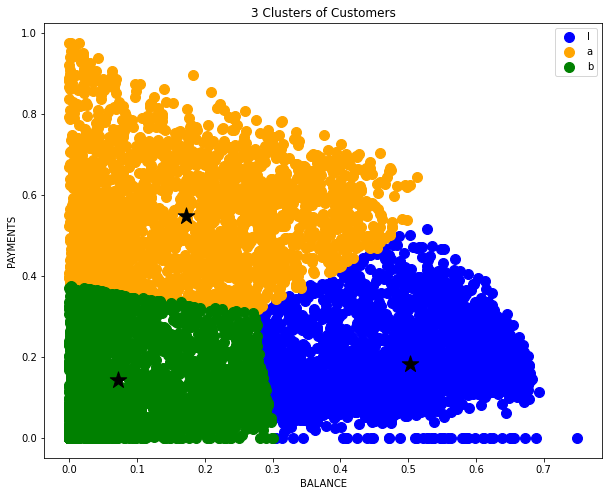

In [45]:
##Plot the clusters with PCA
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='BALANCE', y='PAYMENTS', hue='labels', data=pca_data, palette='bright')

##Plot the clusters without PCA
plt.figure(figsize=(10, 8))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Customers 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Customers 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Customers 3')

plt.title('3 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend('label')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker ='*', s=300, c='black', label = 'Centroids')

In [46]:
#Six clusters
kmeans= KMeans(n_clusters=6, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
y_kmeans = kmeans.fit_predict(X)
labels= kmeans.labels_

In [47]:
pca= PCA(n_components=2)
X_PCA= pca.fit_transform(X)

In [48]:
pca_data = pd.DataFrame(data=X_PCA, columns=['BALANCE','PAYMENTS'])
pca_data['labels']= labels
pca_data.head()

,BALANCE,PAYMENTS,labels
0,-0.172479,-0.129433,0
1,0.005613,0.128088,1
2,0.122415,-0.147708,5
3,0.051620,-0.255386,5
4,0.189585,0.238426,1


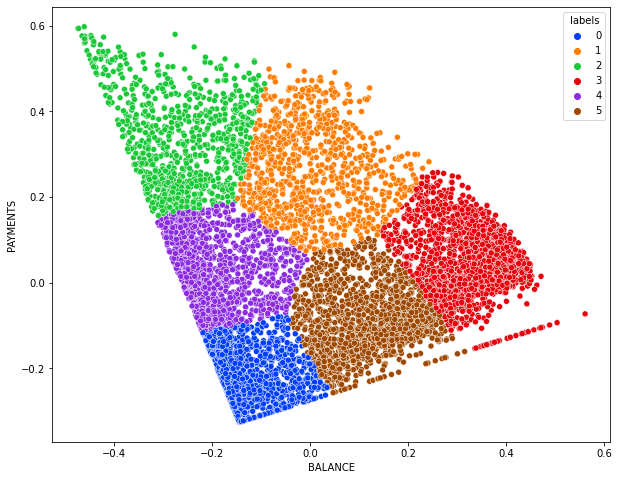

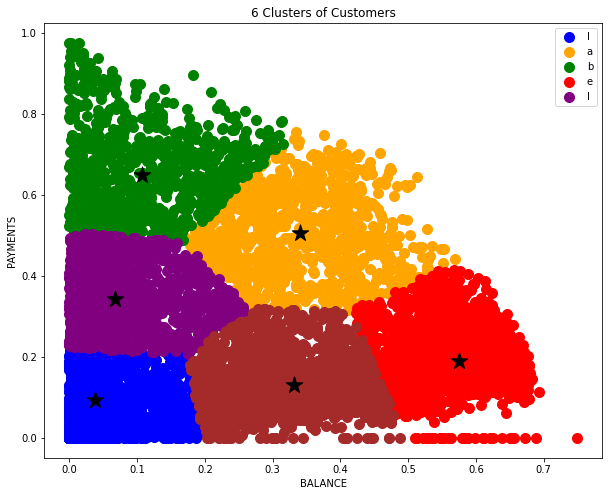

In [50]:
##Plot the clusters with PCA
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='BALANCE', y='PAYMENTS', hue='labels', data=pca_data, palette='bright')

##Plot the clusters without PCA
plt.figure(figsize=(10, 8))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Customers 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Customers 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Customers 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'red', label = 'Customers 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Customers 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Customers 6')

plt.title('6 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend('label')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker ='*', s=300, c='black', label = 'Centroids')

In [51]:
#Three Clusters
hierarchical_ = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(X)
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(X)

In [52]:
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')
kmeansSilhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')

In [53]:
Clustering_Silhouette_Scores = [ ['KMeans',kmeansSilhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.525184
1,Hierarchical,0.399023


In [54]:
#Six Clusters
hierarchical_ = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit_predict(X)
kmeans_ = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42).fit_predict(X)

In [55]:
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')
kmeansSilhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')

In [56]:
Clustering_Silhouette_Scores = [ ['KMeans',kmeansSilhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.454254
1,Hierarchical,0.424733


In [57]:
#Another validation metric
#I'll choose the Spectral Clustering & I'll test this metric & compare with Hierarchical & Kmeans Clustering
spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',random_state=40)
y_spectral = spectral.fit_predict(X)

In [58]:
hierarchical_ = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(X)
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(X)
spectral_ = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',
                                      random_state=40).fit_predict(X)

In [59]:
kmeansSilhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')
Spectral_Silhouette_Score = metrics.silhouette_score(X, spectral_, metric='euclidean')

In [60]:
Clustering_Silhouette_Scores = [['KMeans',kmeansSilhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score], ['Spectral', Spectral_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.525184
2,Spectral,0.492067
1,Hierarchical,0.399023


In [61]:
#Kmean clustering still the best model for this exemple